## Assignment 4: Q learning with the FrozenLake-v0 in gym 

In [102]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import torch as t

In [103]:
# instantiate the environment
env = gym.make('FrozenLake-v0')
env.reset()

0

In [8]:
env.step(3)

(12, 0, True, {'prob': 1.0})

In [7]:
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        print(reward, done)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()


SFFF
FHFH
FFFH
HFFG
0.0 False
  (Up)
SFFF
FHFH
FFFH
HFFG
0.0 True
Episode finished after 2 timesteps

SFFF
FHFH
FFFH
HFFG
0.0 False
  (Up)
SFFF
FHFH
FFFH
HFFG
0.0 False
  (Right)
SFFF
FHFH
FFFH
HFFG
0.0 True
Episode finished after 3 timesteps

SFFF
FHFH
FFFH
HFFG
0.0 False
  (Left)
SFFF
FHFH
FFFH
HFFG
0.0 False
  (Right)
SFFF
FHFH
FFFH
HFFG
0.0 False
  (Up)
SFFF
FHFH
FFFH
HFFG
0.0 False
  (Down)
SFFF
FHFH
FFFH
HFFG
0.0 False
  (Up)
SFFF
FHFH
FFFH
HFFG
0.0 False
  (Up)
SFFF
FHFH
FFFH
HFFG
0.0 False
  (Down)
SFFF
FHFH
FFFH
HFFG
0.0 True
Episode finished after 8 timesteps

SFFF
FHFH
FFFH
HFFG
0.0 False
  (Right)
SFFF
FHFH
FFFH
HFFG
0.0 False
  (Up)
SFFF
FHFH
FFFH
HFFG
0.0 False
  (Down)
SFFF
FHFH
FFFH
HFFG
0.0 False
  (Down)
SFFF
FHFH
FFFH
HFFG
0.0 False
  (Right)
SFFF
FHFH
FFFH
HFFG
0.0 False
  (Down)
SFFF
FHFH
FFFH
HFFG
0.0 False
  (Left)
SFFF
FHFH
FFFH
HFFG
0.0 False
  (Left)
SFFF
FHFH
FFFH
HFFG
0.0 False
  (Up)
SFFF
FHFH
FFFH
HFFG
0.0 False
  (Right)
SFFF
FHFH
FFFH
HFFG
0.0 False
  (

In [8]:
print(env.action_space, env.observation_space) # action, state space => 4 x 16

Discrete(4) Discrete(16)


In [9]:
env.step(env.action_space.sample())

(5, 0, True, {'prob': 1.0})

In [10]:
import torch

Text(0, 0.5, 'states')

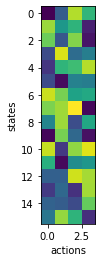

In [11]:
Q_table = torch.rand(16,4)
plt.imshow(Q_table) # visualize random q table
plt.xlabel("actions")
plt.ylabel("states")

In [12]:
Q_table[3,]

tensor([0.2430, 0.9424, 0.3623, 0.4317])

In [13]:
torch.rand(16,4)[0,1]

tensor(0.6867)

In [14]:
if torch.rand(1) < 0.5:
    print(True)

True


In [15]:
def init_q_table():
    return torch.rand(16,4)

In [150]:
def e_greedy_policy(e, Q, current_state):
    if torch.rand(1) <= e:
        return np.random.randint(4) # random action with prob e
    else:
        return int(torch.argmax(Q[current_state,:]))  # else return best action for that state

In [159]:
q = init_q_table()

In [160]:
q[0][0] = 0

In [161]:
def qupdate(Q_table, state, next_state, reward, action, lr=0.2, gamma=0.99):
    "get, next state, reward from the action step"
    curr_state = Q_table[state][action]
    Q_table[state][action] += lr*(reward + gamma*(max(Q_table[next_state,:]))-curr_state)
    

Need a success rate of 76% to consider this problem solved (according to gym), gonna try a bunch of episodes

In [412]:
episodes = 1000000
e=0.533
#Q_table = init_q_table()
#initial_table = Q_table
success = 0
buffer = 0

for episode in range(episodes):
    env.reset()
    state = 0 # first state
    if episode%5000 == 0: # decay learning rate
        e *= 0.99
    ### training
    while True:
        #env.render()
        
        action = e_greedy_policy(e, Q_table, state)
        
        next_state, reward, done_flag, prob = env.step(action)
        
        qupdate(Q_table, state, next_state, reward, action, lr=0.2)
        
        state = next_state
        
        
        success += reward
        buffer += reward
        
        if done_flag: # episode terminates, agent stuck or reaches goal
            
            break
         
        
    if episode%1000 == 0:  
        print(f"success/trials: {success}/{episode}, {round(success/episode if episode != 0 else 0, 4)} eps = {e}")
        
        ## test results (epoch test result)
        wins = buffer/1000.
        print(f"% recent (past 1000) wins: {round(wins, 4)}")
            
        buffer = 0
        
        
        

success/trials: 0.0/0, 0 eps = 0.52767
% recent (past 1000) wins: 0.0
success/trials: 62.0/1000, 0.062 eps = 0.52767
% recent (past 1000) wins: 0.062
success/trials: 126.0/2000, 0.063 eps = 0.52767
% recent (past 1000) wins: 0.064
success/trials: 181.0/3000, 0.0603 eps = 0.52767
% recent (past 1000) wins: 0.055
success/trials: 238.0/4000, 0.0595 eps = 0.52767
% recent (past 1000) wins: 0.057
success/trials: 305.0/5000, 0.061 eps = 0.5223933
% recent (past 1000) wins: 0.067
success/trials: 355.0/6000, 0.0592 eps = 0.5223933
% recent (past 1000) wins: 0.05
success/trials: 416.0/7000, 0.0594 eps = 0.5223933
% recent (past 1000) wins: 0.061
success/trials: 467.0/8000, 0.0584 eps = 0.5223933
% recent (past 1000) wins: 0.051
success/trials: 533.0/9000, 0.0592 eps = 0.5223933
% recent (past 1000) wins: 0.066
success/trials: 584.0/10000, 0.0584 eps = 0.5171693669999999
% recent (past 1000) wins: 0.051
success/trials: 646.0/11000, 0.0587 eps = 0.5171693669999999
% recent (past 1000) wins: 0.062

success/trials: 5847.0/88000, 0.0664 eps = 0.4447958348528967
% recent (past 1000) wins: 0.078
success/trials: 5916.0/89000, 0.0665 eps = 0.4447958348528967
% recent (past 1000) wins: 0.069
success/trials: 5993.0/90000, 0.0666 eps = 0.44034787650436774
% recent (past 1000) wins: 0.077
success/trials: 6076.0/91000, 0.0668 eps = 0.44034787650436774
% recent (past 1000) wins: 0.083
success/trials: 6169.0/92000, 0.0671 eps = 0.44034787650436774
% recent (past 1000) wins: 0.093
success/trials: 6241.0/93000, 0.0671 eps = 0.44034787650436774
% recent (past 1000) wins: 0.072
success/trials: 6316.0/94000, 0.0672 eps = 0.44034787650436774
% recent (past 1000) wins: 0.075
success/trials: 6387.0/95000, 0.0672 eps = 0.4359443977393241
% recent (past 1000) wins: 0.071
success/trials: 6465.0/96000, 0.0673 eps = 0.4359443977393241
% recent (past 1000) wins: 0.078
success/trials: 6559.0/97000, 0.0676 eps = 0.4359443977393241
% recent (past 1000) wins: 0.094
success/trials: 6644.0/98000, 0.0678 eps = 0.

success/trials: 13505.0/173000, 0.0781 eps = 0.3749376214347705
% recent (past 1000) wins: 0.097
success/trials: 13611.0/174000, 0.0782 eps = 0.3749376214347705
% recent (past 1000) wins: 0.106
success/trials: 13706.0/175000, 0.0783 eps = 0.37118824522042276
% recent (past 1000) wins: 0.095
success/trials: 13815.0/176000, 0.0785 eps = 0.37118824522042276
% recent (past 1000) wins: 0.109
success/trials: 13916.0/177000, 0.0786 eps = 0.37118824522042276
% recent (past 1000) wins: 0.101
success/trials: 14008.0/178000, 0.0787 eps = 0.37118824522042276
% recent (past 1000) wins: 0.092
success/trials: 14119.0/179000, 0.0789 eps = 0.37118824522042276
% recent (past 1000) wins: 0.111
success/trials: 14211.0/180000, 0.079 eps = 0.36747636276821855
% recent (past 1000) wins: 0.092
success/trials: 14318.0/181000, 0.0791 eps = 0.36747636276821855
% recent (past 1000) wins: 0.107
success/trials: 14407.0/182000, 0.0792 eps = 0.36747636276821855
% recent (past 1000) wins: 0.089
success/trials: 14515.0

success/trials: 22930.0/258000, 0.0889 eps = 0.3160511159319993
% recent (past 1000) wins: 0.127
success/trials: 23060.0/259000, 0.089 eps = 0.3160511159319993
% recent (past 1000) wins: 0.13
success/trials: 23170.0/260000, 0.0891 eps = 0.3128906047726793
% recent (past 1000) wins: 0.11
success/trials: 23278.0/261000, 0.0892 eps = 0.3128906047726793
% recent (past 1000) wins: 0.108
success/trials: 23407.0/262000, 0.0893 eps = 0.3128906047726793
% recent (past 1000) wins: 0.129
success/trials: 23531.0/263000, 0.0895 eps = 0.3128906047726793
% recent (past 1000) wins: 0.124
success/trials: 23661.0/264000, 0.0896 eps = 0.3128906047726793
% recent (past 1000) wins: 0.13
success/trials: 23789.0/265000, 0.0898 eps = 0.3097616987249525
% recent (past 1000) wins: 0.128
success/trials: 23927.0/266000, 0.09 eps = 0.3097616987249525
% recent (past 1000) wins: 0.138
success/trials: 24030.0/267000, 0.09 eps = 0.3097616987249525
% recent (past 1000) wins: 0.103
success/trials: 24167.0/268000, 0.0902

success/trials: 34615.0/343000, 0.1009 eps = 0.26641313693627316
% recent (past 1000) wins: 0.153
success/trials: 34778.0/344000, 0.1011 eps = 0.26641313693627316
% recent (past 1000) wins: 0.163
success/trials: 34941.0/345000, 0.1013 eps = 0.26374900556691044
% recent (past 1000) wins: 0.163
success/trials: 35101.0/346000, 0.1014 eps = 0.26374900556691044
% recent (past 1000) wins: 0.16
success/trials: 35236.0/347000, 0.1015 eps = 0.26374900556691044
% recent (past 1000) wins: 0.135
success/trials: 35392.0/348000, 0.1017 eps = 0.26374900556691044
% recent (past 1000) wins: 0.156
success/trials: 35534.0/349000, 0.1018 eps = 0.26374900556691044
% recent (past 1000) wins: 0.142
success/trials: 35666.0/350000, 0.1019 eps = 0.26111151551124134
% recent (past 1000) wins: 0.132
success/trials: 35815.0/351000, 0.102 eps = 0.26111151551124134
% recent (past 1000) wins: 0.149
success/trials: 35985.0/352000, 0.1022 eps = 0.26111151551124134
% recent (past 1000) wins: 0.17
success/trials: 36126.0

success/trials: 48896.0/428000, 0.1142 eps = 0.22457114040849152
% recent (past 1000) wins: 0.184
success/trials: 49088.0/429000, 0.1144 eps = 0.22457114040849152
% recent (past 1000) wins: 0.192
success/trials: 49288.0/430000, 0.1146 eps = 0.2223254290044066
% recent (past 1000) wins: 0.2
success/trials: 49493.0/431000, 0.1148 eps = 0.2223254290044066
% recent (past 1000) wins: 0.205
success/trials: 49675.0/432000, 0.115 eps = 0.2223254290044066
% recent (past 1000) wins: 0.182
success/trials: 49875.0/433000, 0.1152 eps = 0.2223254290044066
% recent (past 1000) wins: 0.2
success/trials: 50036.0/434000, 0.1153 eps = 0.2223254290044066
% recent (past 1000) wins: 0.161
success/trials: 50221.0/435000, 0.1155 eps = 0.22010217471436253
% recent (past 1000) wins: 0.185
success/trials: 50425.0/436000, 0.1157 eps = 0.22010217471436253
% recent (past 1000) wins: 0.204
success/trials: 50590.0/437000, 0.1158 eps = 0.22010217471436253
% recent (past 1000) wins: 0.165
success/trials: 50773.0/438000

success/trials: 65645.0/513000, 0.128 eps = 0.189300714237804
% recent (past 1000) wins: 0.213
success/trials: 65895.0/514000, 0.1282 eps = 0.189300714237804
% recent (past 1000) wins: 0.25
success/trials: 66119.0/515000, 0.1284 eps = 0.18740770709542598
% recent (past 1000) wins: 0.224
success/trials: 66323.0/516000, 0.1285 eps = 0.18740770709542598
% recent (past 1000) wins: 0.204
success/trials: 66563.0/517000, 0.1287 eps = 0.18740770709542598
% recent (past 1000) wins: 0.24
success/trials: 66802.0/518000, 0.129 eps = 0.18740770709542598
% recent (past 1000) wins: 0.239
success/trials: 67023.0/519000, 0.1291 eps = 0.18740770709542598
% recent (past 1000) wins: 0.221
success/trials: 67237.0/520000, 0.1293 eps = 0.1855336300244717
% recent (past 1000) wins: 0.214
success/trials: 67479.0/521000, 0.1295 eps = 0.1855336300244717
% recent (past 1000) wins: 0.242
success/trials: 67703.0/522000, 0.1297 eps = 0.1855336300244717
% recent (past 1000) wins: 0.224
success/trials: 67917.0/523000,

success/trials: 85142.0/598000, 0.1424 eps = 0.15956974856947267
% recent (past 1000) wins: 0.245
success/trials: 85397.0/599000, 0.1426 eps = 0.15956974856947267
% recent (past 1000) wins: 0.255
success/trials: 85623.0/600000, 0.1427 eps = 0.15797405108377793
% recent (past 1000) wins: 0.226
success/trials: 85862.0/601000, 0.1429 eps = 0.15797405108377793
% recent (past 1000) wins: 0.239
success/trials: 86094.0/602000, 0.143 eps = 0.15797405108377793
% recent (past 1000) wins: 0.232
success/trials: 86342.0/603000, 0.1432 eps = 0.15797405108377793
% recent (past 1000) wins: 0.248
success/trials: 86596.0/604000, 0.1434 eps = 0.15797405108377793
% recent (past 1000) wins: 0.254


KeyboardInterrupt: 

In [416]:
def renormalize(table): # not really necessary as q decisions are relative
    for i in range(16):
        table[i,:] /= sum(table[i,:])

In [417]:
renormalize(Q_table)
Q_table

tensor([[0.2575, 0.2491, 0.2440, 0.2493],
        [0.2453, 0.2521, 0.2411, 0.2615],
        [0.2499, 0.2488, 0.2499, 0.2514],
        [0.2503, 0.2471, 0.2436, 0.2590],
        [0.2695, 0.2554, 0.2396, 0.2355],
        [0.3632, 0.3017, 0.3286, 0.0065],
        [0.2599, 0.2515, 0.2521, 0.2365],
        [0.1415, 0.1329, 0.1522, 0.5735],
        [0.2341, 0.2329, 0.2583, 0.2747],
        [0.2518, 0.2788, 0.2204, 0.2490],
        [0.3136, 0.2345, 0.2203, 0.2316],
        [0.2916, 0.0498, 0.3607, 0.2979],
        [0.1947, 0.3177, 0.1428, 0.3449],
        [0.2100, 0.2325, 0.2955, 0.2621],
        [0.2326, 0.2815, 0.2385, 0.2474],
        [0.1405, 0.4338, 0.0556, 0.3701]])

In [415]:
# test
success = 0
episodes=1000
for episode in range(episodes):
    env.reset()
    state = 0 # first state
    while True:
        #env.render()
        action = int(torch.argmax(Q_table[state,:]))
        
        next_state, reward, done, info = env.step(action)
        
        state = next_state
        
        success += reward
        if done: # episode terminates            
            break
print(f"success/trials: {success}/{episode}, % wins {success/episode}")

success/trials: 762.0/999, % wins 0.7627627627627628


## With the on-policy update rule

In [418]:
def sarsaqupdate(Q_table, state, next_state, reward, action, next_action, lr=0.2, gamma=0.99):
    "get, next state, reward from the action + next action step"
    curr_state = Q_table[state][action]
    Q_table[state][action] += lr*(reward + gamma*(Q_table[next_state, next_action])-curr_state)
    

In [436]:
episodes = 1300000
e=0.9
Q_table = init_q_table()
initial_table = Q_table
success = 0
buffer = 0

for episode in range(episodes):
    env.reset()
    state = 0 # first state
    if episode%5000 == 0: # decay learning rate
        e *= 0.99
    ### training
    while True:
        #env.render()
        
        action = e_greedy_policy(e, Q_table, state)
        
        next_state, reward, done_flag, prob = env.step(action)
        
        
        next_action = e_greedy_policy(e, Q_table, next_state)
        
        sarsaqupdate(Q_table, state, next_state, reward, action, next_action, lr=0.2)  # on policy update
        
        state=next_state
        
        success += reward
        buffer += reward
        
        if done_flag: # episode terminates, agent stuck or reaches goal
            
            break
         
        
    if episode%1000 == 0:  
        print(f"success/trials: {success}/{episode}, {round(success/episode if episode != 0 else 0, 4)} eps = {e}")
        
        ## test results (epoch test result)
        wins = buffer/1000.
        print(f"% recent (past 1000) wins: {round(wins, 4)}")
            
        buffer = 0
        
        
        

success/trials: 1.0/0, 0 eps = 0.891
% recent (past 1000) wins: 0.001
success/trials: 13.0/1000, 0.013 eps = 0.891
% recent (past 1000) wins: 0.012
success/trials: 27.0/2000, 0.0135 eps = 0.891
% recent (past 1000) wins: 0.014
success/trials: 43.0/3000, 0.0143 eps = 0.891
% recent (past 1000) wins: 0.016
success/trials: 59.0/4000, 0.0147 eps = 0.891
% recent (past 1000) wins: 0.016
success/trials: 76.0/5000, 0.0152 eps = 0.88209
% recent (past 1000) wins: 0.017
success/trials: 95.0/6000, 0.0158 eps = 0.88209
% recent (past 1000) wins: 0.019
success/trials: 112.0/7000, 0.016 eps = 0.88209
% recent (past 1000) wins: 0.017
success/trials: 126.0/8000, 0.0158 eps = 0.88209
% recent (past 1000) wins: 0.014
success/trials: 136.0/9000, 0.0151 eps = 0.88209
% recent (past 1000) wins: 0.01
success/trials: 160.0/10000, 0.016 eps = 0.8732691
% recent (past 1000) wins: 0.024
success/trials: 174.0/11000, 0.0158 eps = 0.8732691
% recent (past 1000) wins: 0.014
success/trials: 190.0/12000, 0.0158 eps 

success/trials: 1458.0/90000, 0.0162 eps = 0.7435517614520281
% recent (past 1000) wins: 0.019
success/trials: 1472.0/91000, 0.0162 eps = 0.7435517614520281
% recent (past 1000) wins: 0.014
success/trials: 1492.0/92000, 0.0162 eps = 0.7435517614520281
% recent (past 1000) wins: 0.02
success/trials: 1510.0/93000, 0.0162 eps = 0.7435517614520281
% recent (past 1000) wins: 0.018
success/trials: 1531.0/94000, 0.0163 eps = 0.7435517614520281
% recent (past 1000) wins: 0.021
success/trials: 1550.0/95000, 0.0163 eps = 0.7361162438375077
% recent (past 1000) wins: 0.019
success/trials: 1568.0/96000, 0.0163 eps = 0.7361162438375077
% recent (past 1000) wins: 0.018
success/trials: 1582.0/97000, 0.0163 eps = 0.7361162438375077
% recent (past 1000) wins: 0.014
success/trials: 1603.0/98000, 0.0164 eps = 0.7361162438375077
% recent (past 1000) wins: 0.021
success/trials: 1621.0/99000, 0.0164 eps = 0.7361162438375077
% recent (past 1000) wins: 0.018
success/trials: 1640.0/100000, 0.0164 eps = 0.72875

success/trials: 3126.0/176000, 0.0178 eps = 0.6267718962446163
% recent (past 1000) wins: 0.025
success/trials: 3145.0/177000, 0.0178 eps = 0.6267718962446163
% recent (past 1000) wins: 0.019
success/trials: 3167.0/178000, 0.0178 eps = 0.6267718962446163
% recent (past 1000) wins: 0.022
success/trials: 3187.0/179000, 0.0178 eps = 0.6267718962446163
% recent (past 1000) wins: 0.02
success/trials: 3211.0/180000, 0.0178 eps = 0.6205041772821701
% recent (past 1000) wins: 0.024
success/trials: 3234.0/181000, 0.0179 eps = 0.6205041772821701
% recent (past 1000) wins: 0.023
success/trials: 3253.0/182000, 0.0179 eps = 0.6205041772821701
% recent (past 1000) wins: 0.019
success/trials: 3272.0/183000, 0.0179 eps = 0.6205041772821701
% recent (past 1000) wins: 0.019
success/trials: 3304.0/184000, 0.018 eps = 0.6205041772821701
% recent (past 1000) wins: 0.032
success/trials: 3336.0/185000, 0.018 eps = 0.6142991355093484
% recent (past 1000) wins: 0.032
success/trials: 3350.0/186000, 0.018 eps = 

success/trials: 5020.0/262000, 0.0192 eps = 0.5283331037437361
% recent (past 1000) wins: 0.017
success/trials: 5045.0/263000, 0.0192 eps = 0.5283331037437361
% recent (past 1000) wins: 0.025
success/trials: 5063.0/264000, 0.0192 eps = 0.5283331037437361
% recent (past 1000) wins: 0.018
success/trials: 5085.0/265000, 0.0192 eps = 0.5230497727062987
% recent (past 1000) wins: 0.022
success/trials: 5115.0/266000, 0.0192 eps = 0.5230497727062987
% recent (past 1000) wins: 0.03
success/trials: 5138.0/267000, 0.0192 eps = 0.5230497727062987
% recent (past 1000) wins: 0.023
success/trials: 5162.0/268000, 0.0193 eps = 0.5230497727062987
% recent (past 1000) wins: 0.024
success/trials: 5191.0/269000, 0.0193 eps = 0.5230497727062987
% recent (past 1000) wins: 0.029
success/trials: 5215.0/270000, 0.0193 eps = 0.5178192749792357
% recent (past 1000) wins: 0.024
success/trials: 5236.0/271000, 0.0193 eps = 0.5178192749792357
% recent (past 1000) wins: 0.021
success/trials: 5265.0/272000, 0.0194 eps

success/trials: 7358.0/348000, 0.0211 eps = 0.4453547936401863
% recent (past 1000) wins: 0.023
success/trials: 7387.0/349000, 0.0212 eps = 0.4453547936401863
% recent (past 1000) wins: 0.029
success/trials: 7429.0/350000, 0.0212 eps = 0.4409012457037845
% recent (past 1000) wins: 0.042
success/trials: 7455.0/351000, 0.0212 eps = 0.4409012457037845
% recent (past 1000) wins: 0.026
success/trials: 7485.0/352000, 0.0213 eps = 0.4409012457037845
% recent (past 1000) wins: 0.03
success/trials: 7518.0/353000, 0.0213 eps = 0.4409012457037845
% recent (past 1000) wins: 0.033
success/trials: 7540.0/354000, 0.0213 eps = 0.4409012457037845
% recent (past 1000) wins: 0.022
success/trials: 7569.0/355000, 0.0213 eps = 0.43649223324674663
% recent (past 1000) wins: 0.029
success/trials: 7598.0/356000, 0.0213 eps = 0.43649223324674663
% recent (past 1000) wins: 0.029
success/trials: 7626.0/357000, 0.0214 eps = 0.43649223324674663
% recent (past 1000) wins: 0.028
success/trials: 7666.0/358000, 0.0214 

success/trials: 10010.0/434000, 0.0231 eps = 0.37540879193989835
% recent (past 1000) wins: 0.017
success/trials: 10030.0/435000, 0.0231 eps = 0.3716547040204994
% recent (past 1000) wins: 0.02
success/trials: 10061.0/436000, 0.0231 eps = 0.3716547040204994
% recent (past 1000) wins: 0.031
success/trials: 10101.0/437000, 0.0231 eps = 0.3716547040204994
% recent (past 1000) wins: 0.04
success/trials: 10123.0/438000, 0.0231 eps = 0.3716547040204994
% recent (past 1000) wins: 0.022
success/trials: 10169.0/439000, 0.0232 eps = 0.3716547040204994
% recent (past 1000) wins: 0.046
success/trials: 10204.0/440000, 0.0232 eps = 0.36793815698029436
% recent (past 1000) wins: 0.035
success/trials: 10228.0/441000, 0.0232 eps = 0.36793815698029436
% recent (past 1000) wins: 0.024
success/trials: 10243.0/442000, 0.0232 eps = 0.36793815698029436
% recent (past 1000) wins: 0.015
success/trials: 10264.0/443000, 0.0232 eps = 0.36793815698029436
% recent (past 1000) wins: 0.021
success/trials: 10282.0/444

success/trials: 13125.0/519000, 0.0253 eps = 0.3164482859022201
% recent (past 1000) wins: 0.037
success/trials: 13171.0/520000, 0.0253 eps = 0.31328380304319786
% recent (past 1000) wins: 0.046
success/trials: 13207.0/521000, 0.0253 eps = 0.31328380304319786
% recent (past 1000) wins: 0.036
success/trials: 13249.0/522000, 0.0254 eps = 0.31328380304319786
% recent (past 1000) wins: 0.042
success/trials: 13295.0/523000, 0.0254 eps = 0.31328380304319786
% recent (past 1000) wins: 0.046
success/trials: 13334.0/524000, 0.0254 eps = 0.31328380304319786
% recent (past 1000) wins: 0.039
success/trials: 13372.0/525000, 0.0255 eps = 0.3101509650127659
% recent (past 1000) wins: 0.038
success/trials: 13437.0/526000, 0.0255 eps = 0.3101509650127659
% recent (past 1000) wins: 0.065
success/trials: 13484.0/527000, 0.0256 eps = 0.3101509650127659
% recent (past 1000) wins: 0.047
success/trials: 13548.0/528000, 0.0257 eps = 0.3101509650127659
% recent (past 1000) wins: 0.064
success/trials: 13587.0/5

success/trials: 17088.0/604000, 0.0283 eps = 0.26674792865928726
% recent (past 1000) wins: 0.055
success/trials: 17120.0/605000, 0.0283 eps = 0.26408044937269437
% recent (past 1000) wins: 0.032
success/trials: 17172.0/606000, 0.0283 eps = 0.26408044937269437
% recent (past 1000) wins: 0.052
success/trials: 17228.0/607000, 0.0284 eps = 0.26408044937269437
% recent (past 1000) wins: 0.056
success/trials: 17293.0/608000, 0.0284 eps = 0.26408044937269437
% recent (past 1000) wins: 0.065
success/trials: 17344.0/609000, 0.0285 eps = 0.26408044937269437
% recent (past 1000) wins: 0.051
success/trials: 17388.0/610000, 0.0285 eps = 0.2614396448789674
% recent (past 1000) wins: 0.044
success/trials: 17434.0/611000, 0.0285 eps = 0.2614396448789674
% recent (past 1000) wins: 0.046
success/trials: 17485.0/612000, 0.0286 eps = 0.2614396448789674
% recent (past 1000) wins: 0.051
success/trials: 17540.0/613000, 0.0286 eps = 0.2614396448789674
% recent (past 1000) wins: 0.055
success/trials: 17577.0/

success/trials: 21600.0/689000, 0.0313 eps = 0.22485335081260746
% recent (past 1000) wins: 0.071
success/trials: 21645.0/690000, 0.0314 eps = 0.2226048173044814
% recent (past 1000) wins: 0.045
success/trials: 21715.0/691000, 0.0314 eps = 0.2226048173044814
% recent (past 1000) wins: 0.07
success/trials: 21793.0/692000, 0.0315 eps = 0.2226048173044814
% recent (past 1000) wins: 0.078
success/trials: 21855.0/693000, 0.0315 eps = 0.2226048173044814
% recent (past 1000) wins: 0.062
success/trials: 21914.0/694000, 0.0316 eps = 0.2226048173044814
% recent (past 1000) wins: 0.059
success/trials: 21975.0/695000, 0.0316 eps = 0.22037876913143659
% recent (past 1000) wins: 0.061
success/trials: 22044.0/696000, 0.0317 eps = 0.22037876913143659
% recent (past 1000) wins: 0.069
success/trials: 22102.0/697000, 0.0317 eps = 0.22037876913143659
% recent (past 1000) wins: 0.058
success/trials: 22160.0/698000, 0.0317 eps = 0.22037876913143659
% recent (past 1000) wins: 0.058
success/trials: 22219.0/69

success/trials: 27035.0/774000, 0.0349 eps = 0.1895386015770557
% recent (past 1000) wins: 0.08
success/trials: 27137.0/775000, 0.035 eps = 0.18764321556128516
% recent (past 1000) wins: 0.102
success/trials: 27216.0/776000, 0.0351 eps = 0.18764321556128516
% recent (past 1000) wins: 0.079
success/trials: 27283.0/777000, 0.0351 eps = 0.18764321556128516
% recent (past 1000) wins: 0.067
success/trials: 27357.0/778000, 0.0352 eps = 0.18764321556128516
% recent (past 1000) wins: 0.074
success/trials: 27449.0/779000, 0.0352 eps = 0.18764321556128516
% recent (past 1000) wins: 0.092
success/trials: 27527.0/780000, 0.0353 eps = 0.1857667834056723
% recent (past 1000) wins: 0.078
success/trials: 27634.0/781000, 0.0354 eps = 0.1857667834056723
% recent (past 1000) wins: 0.107
success/trials: 27710.0/782000, 0.0354 eps = 0.1857667834056723
% recent (past 1000) wins: 0.076
success/trials: 27809.0/783000, 0.0355 eps = 0.1857667834056723
% recent (past 1000) wins: 0.099
success/trials: 27870.0/784

success/trials: 33912.0/859000, 0.0395 eps = 0.1597702740828871
% recent (past 1000) wins: 0.05
success/trials: 33994.0/860000, 0.0395 eps = 0.15817257134205823
% recent (past 1000) wins: 0.082
success/trials: 34064.0/861000, 0.0396 eps = 0.15817257134205823
% recent (past 1000) wins: 0.07
success/trials: 34149.0/862000, 0.0396 eps = 0.15817257134205823
% recent (past 1000) wins: 0.085
success/trials: 34217.0/863000, 0.0396 eps = 0.15817257134205823
% recent (past 1000) wins: 0.068
success/trials: 34307.0/864000, 0.0397 eps = 0.15817257134205823
% recent (past 1000) wins: 0.09
success/trials: 34399.0/865000, 0.0398 eps = 0.15659084562863765
% recent (past 1000) wins: 0.092
success/trials: 34469.0/866000, 0.0398 eps = 0.15659084562863765
% recent (past 1000) wins: 0.07
success/trials: 34563.0/867000, 0.0399 eps = 0.15659084562863765
% recent (past 1000) wins: 0.094
success/trials: 34657.0/868000, 0.0399 eps = 0.15659084562863765
% recent (past 1000) wins: 0.094
success/trials: 34739.0/8

success/trials: 41598.0/943000, 0.0441 eps = 0.13467726504325409
% recent (past 1000) wins: 0.099
success/trials: 41727.0/944000, 0.0442 eps = 0.13467726504325409
% recent (past 1000) wins: 0.129
success/trials: 41867.0/945000, 0.0443 eps = 0.13333049239282155
% recent (past 1000) wins: 0.14
success/trials: 41989.0/946000, 0.0444 eps = 0.13333049239282155
% recent (past 1000) wins: 0.122
success/trials: 42090.0/947000, 0.0444 eps = 0.13333049239282155
% recent (past 1000) wins: 0.101
success/trials: 42192.0/948000, 0.0445 eps = 0.13333049239282155
% recent (past 1000) wins: 0.102
success/trials: 42367.0/949000, 0.0446 eps = 0.13333049239282155
% recent (past 1000) wins: 0.175
success/trials: 42463.0/950000, 0.0447 eps = 0.13199718746889333
% recent (past 1000) wins: 0.096
success/trials: 42550.0/951000, 0.0447 eps = 0.13199718746889333
% recent (past 1000) wins: 0.087
success/trials: 42659.0/952000, 0.0448 eps = 0.13199718746889333
% recent (past 1000) wins: 0.109
success/trials: 42775

success/trials: 52157.0/1027000, 0.0508 eps = 0.11352528387177409
% recent (past 1000) wins: 0.215
success/trials: 52279.0/1028000, 0.0509 eps = 0.11352528387177409
% recent (past 1000) wins: 0.122
success/trials: 52416.0/1029000, 0.0509 eps = 0.11352528387177409
% recent (past 1000) wins: 0.137
success/trials: 52532.0/1030000, 0.051 eps = 0.11239003103305635
% recent (past 1000) wins: 0.116
success/trials: 52773.0/1031000, 0.0512 eps = 0.11239003103305635
% recent (past 1000) wins: 0.241
success/trials: 52974.0/1032000, 0.0513 eps = 0.11239003103305635
% recent (past 1000) wins: 0.201
success/trials: 53126.0/1033000, 0.0514 eps = 0.11239003103305635
% recent (past 1000) wins: 0.152
success/trials: 53308.0/1034000, 0.0516 eps = 0.11239003103305635
% recent (past 1000) wins: 0.182
success/trials: 53454.0/1035000, 0.0516 eps = 0.11126613072272579
% recent (past 1000) wins: 0.146
success/trials: 53680.0/1036000, 0.0518 eps = 0.11126613072272579
% recent (past 1000) wins: 0.226
success/tri

success/trials: 65285.0/1111000, 0.0588 eps = 0.09569536531669004
% recent (past 1000) wins: 0.097
success/trials: 65400.0/1112000, 0.0588 eps = 0.09569536531669004
% recent (past 1000) wins: 0.115
success/trials: 65589.0/1113000, 0.0589 eps = 0.09569536531669004
% recent (past 1000) wins: 0.189
success/trials: 65775.0/1114000, 0.059 eps = 0.09569536531669004
% recent (past 1000) wins: 0.186
success/trials: 65977.0/1115000, 0.0592 eps = 0.09473841166352313
% recent (past 1000) wins: 0.202
success/trials: 66192.0/1116000, 0.0593 eps = 0.09473841166352313
% recent (past 1000) wins: 0.215
success/trials: 66502.0/1117000, 0.0595 eps = 0.09473841166352313
% recent (past 1000) wins: 0.31
success/trials: 66651.0/1118000, 0.0596 eps = 0.09473841166352313
% recent (past 1000) wins: 0.149
success/trials: 66869.0/1119000, 0.0598 eps = 0.09473841166352313
% recent (past 1000) wins: 0.218
success/trials: 67109.0/1120000, 0.0599 eps = 0.0937910275468879
% recent (past 1000) wins: 0.24
success/trials

success/trials: 82924.0/1195000, 0.0694 eps = 0.08066575683209214
% recent (past 1000) wins: 0.17
success/trials: 83029.0/1196000, 0.0694 eps = 0.08066575683209214
% recent (past 1000) wins: 0.105
success/trials: 83206.0/1197000, 0.0695 eps = 0.08066575683209214
% recent (past 1000) wins: 0.177
success/trials: 83473.0/1198000, 0.0697 eps = 0.08066575683209214
% recent (past 1000) wins: 0.267
success/trials: 83650.0/1199000, 0.0698 eps = 0.08066575683209214
% recent (past 1000) wins: 0.177
success/trials: 83942.0/1200000, 0.07 eps = 0.07985909926377122
% recent (past 1000) wins: 0.292
success/trials: 84144.0/1201000, 0.0701 eps = 0.07985909926377122
% recent (past 1000) wins: 0.202
success/trials: 84343.0/1202000, 0.0702 eps = 0.07985909926377122
% recent (past 1000) wins: 0.199
success/trials: 84595.0/1203000, 0.0703 eps = 0.07985909926377122
% recent (past 1000) wins: 0.252
success/trials: 84843.0/1204000, 0.0705 eps = 0.07985909926377122
% recent (past 1000) wins: 0.248
success/trial

success/trials: 104254.0/1279000, 0.0815 eps = 0.06868348551593437
% recent (past 1000) wins: 0.306
success/trials: 104505.0/1280000, 0.0816 eps = 0.06799665066077502
% recent (past 1000) wins: 0.251
success/trials: 104771.0/1281000, 0.0818 eps = 0.06799665066077502
% recent (past 1000) wins: 0.266
success/trials: 104920.0/1282000, 0.0818 eps = 0.06799665066077502
% recent (past 1000) wins: 0.149
success/trials: 105073.0/1283000, 0.0819 eps = 0.06799665066077502
% recent (past 1000) wins: 0.153
success/trials: 105372.0/1284000, 0.0821 eps = 0.06799665066077502
% recent (past 1000) wins: 0.299
success/trials: 105588.0/1285000, 0.0822 eps = 0.06731668415416728
% recent (past 1000) wins: 0.216
success/trials: 105923.0/1286000, 0.0824 eps = 0.06731668415416728
% recent (past 1000) wins: 0.335
success/trials: 106229.0/1287000, 0.0825 eps = 0.06731668415416728
% recent (past 1000) wins: 0.306
success/trials: 106496.0/1288000, 0.0827 eps = 0.06731668415416728
% recent (past 1000) wins: 0.267


In [484]:
# test
success = 0
episodes=1000
for episode in range(episodes):
    env.reset()
    state = 0 # first state
    while True:
        #env.render()
        action = int(torch.argmax(Q_table[state,:]))
        
        
        next_state, reward, done, info = env.step(action)
        
        state = next_state
        
        success += reward
        if done: # episode terminates
            
            break
print(f"success/trials: {success}/{episode+1}, % wins {success/(episode+1)}")

success/trials: 736.0/1000, % wins 0.736


###  Deep Q-learning with experience replay

First real test of the module inside my cortex called ``skill``. An og implementation of the nature paper "Human-level control through deep reinforcement
learning" by Mnih et. al. (2015) on deep q networks. A deep convolutional network is used to approximate the optimal action-value function. In their words, here is a key highlight taken from the paper that basically summarizes why Deep Q networks were unsuccesful in the past and how they were able to make efficient use of them as function approximators:
> Reinforcement learning is known to be unstable or even to diverge
when a nonlinear function approximator such as a neural network is
used to represent the action-value (also known as Q) function. This
instability has several causes: the correlations present in the sequence of observations, the fact that small updates to Q may significantly change the policy and therefore change the data distribution, and the correlations between the action-values (Q) and the target values $$r + \gamma \max_{a'}{Q(s', a')}$$. We address these instabilities with a novel variant of Q-learning, which
uses two key ideas. First, we used a biologically inspired mechanism
termed experience replay that randomizes over the data, thereby
removing correlations in the observation sequence and smoothing over
changes in the data distribution (see below for details). Second, we used an iterative update that adjusts the action-values (Q) towards target
values that are only periodically updated, thereby reducing correlations
with the target.

Update: Yeh, so I'm back after a 2 day stint doing some soul searching. I suppose if the test was time constrained, I'd fail spectacularly but... Anyway, I think I was mainly confused by using heavy machinery like below to do something so simple. Isn't Q supposed to be discrete, not continuous? 

Ans: Q still is and should be discrete. It's inputs are the 16 discrete state values that I will reshape as a 4 x 4 matrix and then do some convolutions on it like in the Nature paper. Output is a vector of action probabilities corresponding in value to the most favourable outcome.

Update: Convolutional neural nets don't really make sense for frozen lake. I'm going to load the Atari game environment to see what I can do with it. For the frozen lake environment, I've implemented experience replay with a fully connected linear neural network... Training seems to be painfully slow... 

In [89]:
import torch as t
import torch.nn as nn
import torch.nn.functional as F


class DQN(nn.Module):
    """state/env rep is the input and discrete action probs are the output"""
    def __init__(self, inputs=16, outputs=6): # outputs action probabilities
                
        super(DQN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=2, stride=2)
        self.bn1 = nn.BatchNorm2d(4)
        
        #self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(4, 8, kernel_size=1, stride=2)
        self.bn2 = nn.BatchNorm2d(8)
        #self.conv3 = nn.Conv2d(32, 64, kernel_size=1, stride=2)
        #self.bn3 = nn.BatchNorm2d(64)
        
        # fully connected linear layers
        
        self.dl1 = nn.Linear(16, 32)  # input layer is output channel size * kernel size
        self.bn3 = nn.BatchNorm1d(32)
        self.head = nn.Linear(32,outputs)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = x.view(-1, 16)
        x = F.relu(self.bn3(self.dl1(x)))
    
        return self.head(x)
    

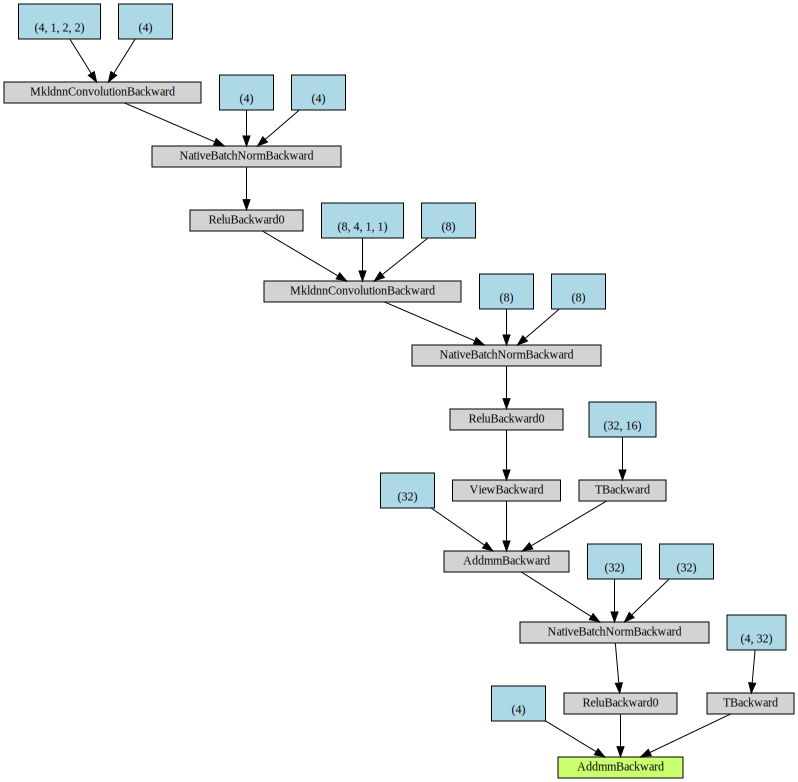

In [90]:
from torchviz import make_dot
import torch as t
net = DQN()
x = t.rand(4,1,2,2)
make_dot(net.forward(x))



I need to now also initialize a memory to train the Q function approximator periodically after say 10000-50000 episodes. The format will be similar to what I used to update the Q-table, I will need something like $$(s_t, s_{t+1}, a_t, r_t)$$ fora timestep $t$. Terms have their usual meaning in an MDP: state, next state, action and reward...

In [250]:
# instantiate the environment
env = gym.make('Pong-v0')
env.reset()

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [109, 118,  43],
        [109, 118,  43],
        [109, 118,  43]],

       [[109, 118,  43],
        [109, 118,  43],
        [109, 118,  43],
        ...,
        [109, 118,  43],
        [109, 118,  43],
        [109, 118,  43]],

       [[109, 118,  43],
        [109, 118,  43],
        [109, 118,  43],
        ...,
        [109, 118,  43],
        [109, 118,  43],
        [109, 118,  43]],

       ...,

       [[ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24],
        ...,
        [ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24]],

       [[ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24],
        ...,
        [ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24]],

       [[ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24],
        ...,
        [ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24]]

In [256]:
s, r, done, prob = env.step(5)
s.shape

(210, 160, 3)

## Try a similar approach for the frozen lake problem using non-linear function approximators that are not convolutional

In [210]:
class SDQN(nn.Module):
    """state/env rep is the input and discrete action probs are the output"""
    def __init__(self, inputs=16, outputs=4): # outputs action probabilities
                
        super(SDQN, self).__init__()
        self.layer1 = nn.Linear(inputs, 32)
        
        self.layer2 = nn.Linear(32, 64)
        
        self.layer3 = nn.Linear(64, 10)
        
        self.layer4 = nn.Linear(10, outputs)
        

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu((self.layer3(x)))

        return F.softmax(self.layer4(x))  # constrain output to [[0,1)]*4 
    

<ipython-input-210-8763cf3b9cf3>:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(self.layer4(x))  # constrain output to [[0,1)]*4


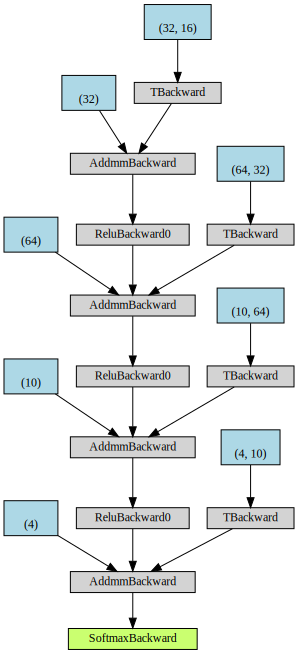

In [211]:
net = SDQN()
x = t.rand(1,16)
make_dot(net.forward(x))



In [212]:
net(t.rand(1,16))  # output quality of action (normalized, but not really necessary)

<ipython-input-210-8763cf3b9cf3>:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(self.layer4(x))  # constrain output to [[0,1)]*4


tensor([[0.2392, 0.2994, 0.2697, 0.1917]], grad_fn=<SoftmaxBackward>)

In [213]:
torch.zeros(16)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [245]:
import torch
import torch.optim as optim
# convert env state into something the NN can process
def transformed(state):  
    init = torch.zeros(16)
    init[state] = 1
    return init

def select_action(state, eps=0.4):
    
    if torch.rand(1) <= eps:
        return np.random.randint(4)
    else:
        return int(torch.argmax(target(transformed(state)))) 

    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

policy = SDQN().to(device)
target = SDQN().to(device)  # lagged copy to reduce policy divergence

target.load_state_dict(policy.state_dict())
target.eval()


optimizer = optim.RMSprop(policy.parameters())    


In [246]:
x = []

for i in range(20):
    if i < 5:
        x.append(None)
    else:
        x[(i)%5] = i
    print(x)

[None]
[None, None]
[None, None, None]
[None, None, None, None]
[None, None, None, None, None]
[5, None, None, None, None]
[5, 6, None, None, None]
[5, 6, 7, None, None]
[5, 6, 7, 8, None]
[5, 6, 7, 8, 9]
[10, 6, 7, 8, 9]
[10, 11, 7, 8, 9]
[10, 11, 12, 8, 9]
[10, 11, 12, 13, 9]
[10, 11, 12, 13, 14]
[15, 11, 12, 13, 14]
[15, 16, 12, 13, 14]
[15, 16, 17, 13, 14]
[15, 16, 17, 18, 14]
[15, 16, 17, 18, 19]


In [249]:
import random

# simple DQN with experience replay


episodes = 10000000

buffer_size = 100000
training_sample_size = 20000

eps = 0.4
min_eps = 0.001

replay_buffer = []
cumulative_success = 0
gamma = 0.99 


counter = 0
for episode in range(episodes):
    env.reset()
    state = 0 # starting state
    if episode%5000 == 0: # decay learning rate
        eps *= 0.99
    while True:
        action = select_action(state, eps=eps)
        
        next_state, reward, done_flag, prob = env.step(action)

        # store experience
        
        if counter < buffer_size:
            replay_buffer.append(None)
        
        replay_buffer[counter%buffer_size] = (state, action, reward, next_state)

        # need to optimize the policy using SGD
        
        if counter > buffer_size:
        
            minibatch = random.sample(replay_buffer, training_sample_size)
            
            # training step
            
            actual_y = []
            pred_y = []
            for experience in minibatch:
                if experience == None:
                    continue
                s, a, r, ns =  experience
                
                if ns == 15:  # next state is goal state
                    actual_y.append(r)
                else:
                    it_bellman_step = r + gamma*max(target(transformed(ns))) # max taken over all actions 
                    actual_y.append(it_bellman_step)
                    
                pred_y.append(float(target(transformed(s))[a]))  # predicted Q value for that state
                
            
            loss = F.smooth_l1_loss(t.tensor(pred_y, requires_grad=True), t.tensor(actual_y, requires_grad=True))
            
            # optimize the model 
            
            optimizer.zero_grad()
            loss.backward()

            for param in policy.parameters():  # as suggested by the DQN paper, limit grads to [-1,1]
                if param.grad == None:
                    continue
                print(param.grad.data)
                param.grad.data.clamp_(-1, 1)
            optimizer.step()
            
        # update step
        
        state = next_state
        cumulative_success += reward
        counter += 1
        
        if done_flag: # episode terminates, agent stuck or reaches goal
            
            break
    
        
    
    # reset the target to policy every 2000 episodes
    if episode%200 == 0:
        target.load_state_dict(policy.state_dict())

        print(counter)


<ipython-input-210-8763cf3b9cf3>:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(self.layer4(x))  # constrain output to [[0,1)]*4


9
1200
2509
3764
4924
6109
7273
8474
9675
10842
12015
13099
14321
15556
16785
17980
19137
20328
21522
22763
23996
25165
26288
27540
28790
30008
31177
32330
33445
34666
35868
36963
38186
39318
40519
41679
42876
44025
45342
46483
47770
48893
50058
51264
52471
53599
54853
56082
57245
58408
59587
60783
62005
63142
64335
65410
66555
67749
68967
70196
71473
72572
73665
74851
76018
77163
78316
79507
80719
81973
83145
84471
85658
86798
87875
89117
90288
91522
92717
93867
94978
96121
97294
98436
99560


KeyboardInterrupt: 